In [57]:
import server
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
sv = server.Server()

def probability(res):
    keys_as_int = sorted(map(int, res.keys()))
    ans = {}
    
    # Convert integers to binary representation in big endian
    binary_labels = [format(key, '05b') for key in keys_as_int]
    

    for i in range(5):
        for j in range(len(binary_labels)):
            if binary_labels[j][i] == '0':
                if i in ans:
                    ans[i] += res[str(keys_as_int[j])]
                    
                else:
                    ans[i] = res[str(keys_as_int[j])]
                    
    return ans

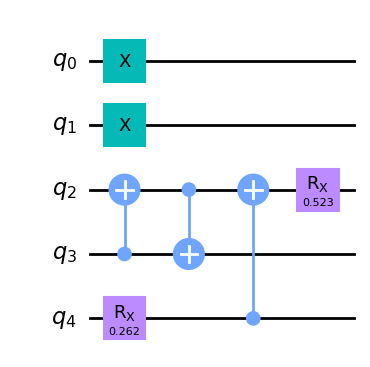

In [68]:
qc = QuantumCircuit(5)

qc.x(0)
qc.x(1)

qc.cx(3, 2)
qc.cx(2, 3)

qc.rx(3.141/12, 4)
qc.cx(4, 2)
qc.rx(3.141/6, 2)
qc.draw()

In [70]:
sv.probe(vault_index=12, circuit=qc.qasm())

{'0': 0.475,
 '2': 0.015,
 '4': 0.315,
 '5': 0.01,
 '6': 0.005,
 '8': 0.035,
 '9': 0.005,
 '10': 0.005,
 '12': 0.045,
 '13': 0.005,
 '14': 0.005,
 '16': 0.05,
 '20': 0.015,
 '21': 0.005,
 '26': 0.005,
 '30': 0.005}

In [69]:
sv.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.3075587518542064,
 'topVaultScores': [0.8,
  0,
  0,
  0,
  0,
  0.9230769230769231,
  0,
  0.002,
  0,
  0.8555,
  0.941,
  0.22462809917355372,
  0.7445],
 'probesRemaining': [34, 18, 20, 20, 20, 5, 20, 15, 20, 11, 10, 14, 2],
 'attacksRemaining': [36, 20, 20, 20, 20, 16, 20, 19, 20, 18, 16, 19, 18],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

In [42]:
sv.attack(vault_index=12, circuit=qc.qasm())

{'costFactor': 1, 'score': 0.568, 'rawScore': 0.568}

In [27]:
z_meas = {'0': 0.005,
 '2': 0.005,
 '4': 0.015,
 '5': 0.01,
 '8': 0.025,
 '10': 0.015,
 '16': 0.03,
 '18': 0.08,
 '20': 0.01,
 '24': 0.595,
 '25': 0.015,
 '26': 0.175,
 '27': 0.01,
 '28': 0.005,
 '30': 0.005}

y_meas = {'0': 0.045,
 '1': 0.06,
 '2': 0.005,
 '3': 0.04,
 '4': 0.015,
 '5': 0.03,
 '6': 0.01,
 '7': 0.015,
 '9': 0.015,
 '10': 0.015,
 '11': 0.025,
 '12': 0.015,
 '13': 0.02,
 '14': 0.02,
 '15': 0.02,
 '16': 0.03,
 '17': 0.085,
 '18': 0.005,
 '19': 0.005,
 '20': 0.025,
 '21': 0.04,
 '22': 0.045,
 '23': 0.055,
 '24': 0.03,
 '25': 0.08,
 '26': 0.04,
 '27': 0.045,
 '28': 0.035,
 '29': 0.04,
 '30': 0.025,
 '31': 0.065}

x_meas = {'0': 0.035,
 '1': 0.005,
 '2': 0.035,
 '3': 0.035,
 '4': 0.045,
 '5': 0.03,
 '6': 0.055,
 '7': 0.035,
 '10': 0.085,
 '11': 0.03,
 '12': 0.015,
 '13': 0.02,
 '14': 0.085,
 '15': 0.13,
 '16': 0.035,
 '17': 0.02,
 '18': 0.06,
 '19': 0.035,
 '22': 0.045,
 '23': 0.03,
 '24': 0.005,
 '26': 0.025,
 '27': 0.01,
 '28': 0.005,
 '30': 0.05,
 '31': 0.04}

In [39]:
sv.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.038384615384615385,
 'topVaultScores': [0.8, 0, 0, 0, 0, 0.46061538461538465, 0, 0, 0, 0, 0, 0, 0],
 'probesRemaining': [34, 19, 20, 20, 20, 6, 20, 20, 20, 16, 20, 20, 20],
 'attacksRemaining': [37, 20, 20, 20, 20, 17, 20, 20, 20, 20, 20, 20, 20],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

In [11]:
def plot(res):
    # Convert keys to integers and sort them
    keys_as_int = sorted(map(int, res.keys()))

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, '05b') for key in keys_as_int]
    print(binary_labels)

    # Extract corresponding values
    values = [res[str(key)] for key in keys_as_int]

    # Plotting
    plt.bar(binary_labels, values)
    plt.xlabel('Binary Number (Big Endian)')
    plt.ylabel('Value')
    plt.title('Histogram of Result Object')
    plt.show()

['00000', '00010', '00100', '00110', '00111', '01000', '01010', '01011', '10000', '10010', '10100', '11000', '11010', '11011', '11100', '11111']


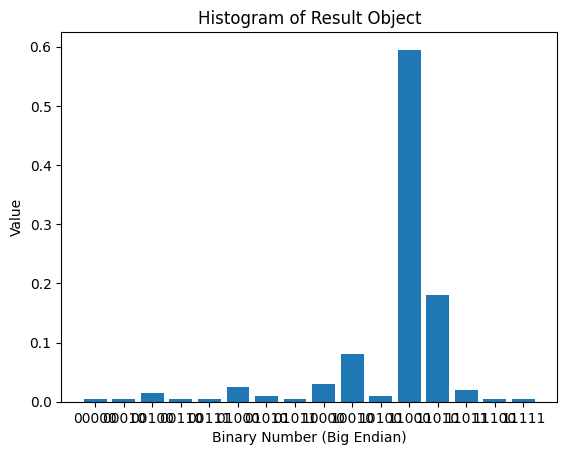

In [12]:
plot({'0': 0.005,
 '2': 0.005,
 '4': 0.015,
 '6': 0.005,
 '7': 0.005,
 '8': 0.025,
 '10': 0.01,
 '11': 0.005,
 '16': 0.03,
 '18': 0.08,
 '20': 0.01,
 '24': 0.595,
 '26': 0.18,
 '27': 0.02,
 '28': 0.005,
 '31': 0.005})

['00000', '00010', '00100', '00101', '01000', '01010', '10000', '10010', '10100', '11000', '11001', '11010', '11011', '11100', '11110']


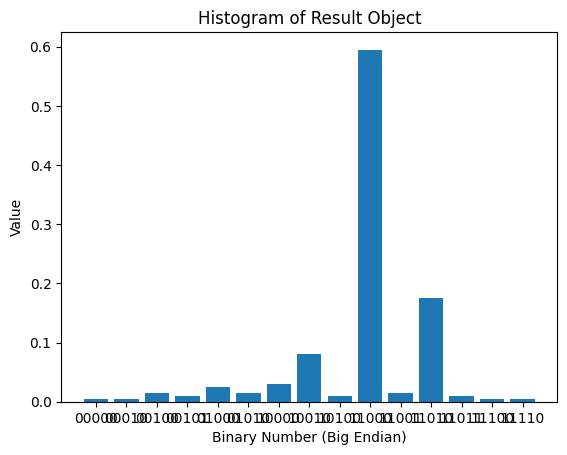

In [15]:
plot(z_meas)

['00001', '00011', '00101', '01001', '01011', '10001', '10011', '10100', '10101', '11000', '11001', '11011', '11101', '11111']


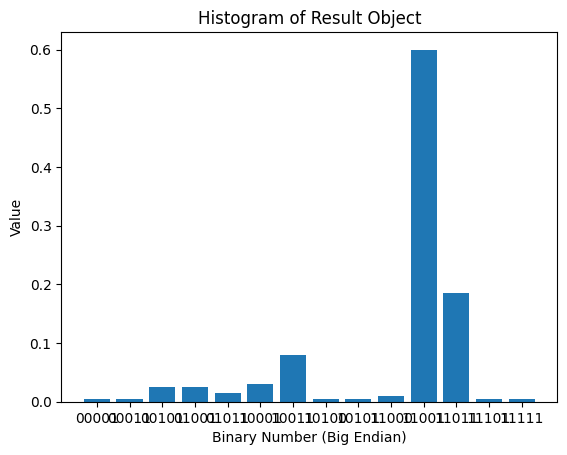

In [19]:
plot({'1': 0.005,
 '3': 0.005,
 '5': 0.025,
 '9': 0.025,
 '11': 0.015,
 '17': 0.03,
 '19': 0.08,
 '20': 0.005,
 '21': 0.005,
 '24': 0.01,
 '25': 0.6,
 '27': 0.185,
 '29': 0.005,
 '31': 0.005})

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10110', '10111', '11000', '11010', '11011', '11100', '11110', '11111']


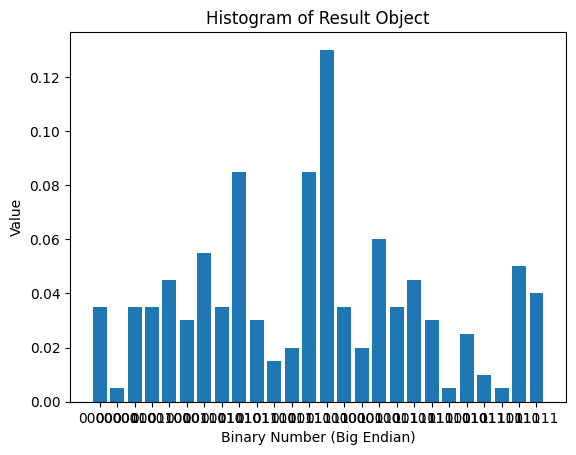

In [23]:
plot(x_meas)

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']


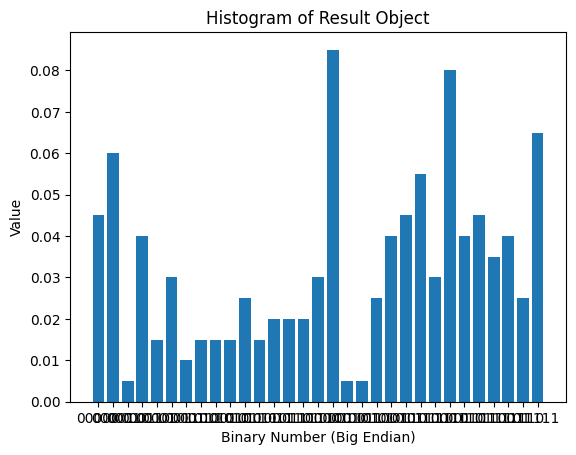

In [28]:
plot(y_meas)

In [48]:
sv.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.27413141025641025,
 'topVaultScores': [0.8,
  0,
  0,
  0,
  0,
  0.9230769230769231,
  0,
  0.002,
  0,
  0.8555,
  0.941,
  0,
  0.568],
 'probesRemaining': [34, 19, 20, 20, 20, 5, 20, 16, 20, 11, 10, 16, 12],
 'attacksRemaining': [36, 20, 20, 20, 20, 16, 20, 19, 20, 18, 17, 20, 19],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

['00000', '00001', '00010', '00100', '00110', '01000', '01010', '01100', '01110', '10000', '10100', '11000', '11110']


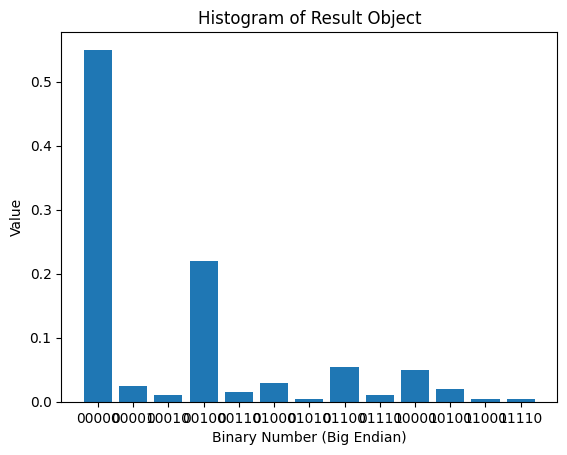

In [52]:
plot({'0': 0.55,
 '1': 0.025,
 '2': 0.01,
 '4': 0.22,
 '6': 0.015,
 '8': 0.03,
 '10': 0.005,
 '12': 0.055,
 '14': 0.01,
 '16': 0.05,
 '20': 0.02,
 '24': 0.005,
 '30': 0.005})

In [58]:
probability({'0': 0.55,
 '1': 0.025,
 '2': 0.01,
 '4': 0.22,
 '6': 0.015,
 '8': 0.03,
 '10': 0.005,
 '12': 0.055,
 '14': 0.01,
 '16': 0.05,
 '20': 0.02,
 '24': 0.005,
 '30': 0.005})

{0: 0.9200000000000002,
 1: 0.8900000000000001,
 2: 0.6750000000000002,
 3: 0.9550000000000002,
 4: 0.9750000000000002}

In [63]:
probability({'0': 0.57,
 '2': 0.005,
 '4': 0.23,
 '6': 0.015,
 '8': 0.03,
 '9': 0.005,
 '12': 0.055,
 '14': 0.01,
 '16': 0.05,
 '20': 0.015,
 '21': 0.005,
 '24': 0.005,
 '30': 0.005})

{0: 0.92, 1: 0.89, 2: 0.665, 3: 0.9650000000000001, 4: 0.9900000000000001}

['00000', '00001', '00011', '00100', '00101', '00110', '01000', '01001', '01100', '01110', '10000', '10100', '10101', '11011', '11110']


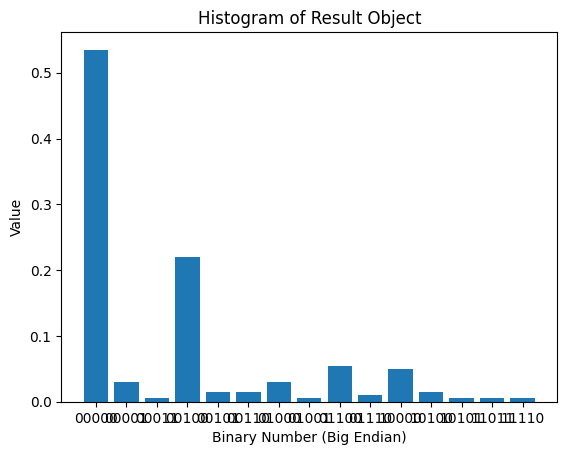

In [66]:
plot({'0': 0.535,
 '1': 0.03,
 '3': 0.005,
 '4': 0.22,
 '5': 0.015,
 '6': 0.015,
 '8': 0.03,
 '9': 0.005,
 '12': 0.055,
 '14': 0.01,
 '16': 0.05,
 '20': 0.015,
 '21': 0.005,
 '27': 0.005,
 '30': 0.005})

In [67]:
probability({'0': 0.535,
 '1': 0.03,
 '3': 0.005,
 '4': 0.22,
 '5': 0.015,
 '6': 0.015,
 '8': 0.03,
 '9': 0.005,
 '12': 0.055,
 '14': 0.01,
 '16': 0.05,
 '20': 0.015,
 '21': 0.005,
 '27': 0.005,
 '30': 0.005})

{0: 0.9200000000000002,
 1: 0.8900000000000001,
 2: 0.6600000000000001,
 3: 0.9600000000000002,
 4: 0.9350000000000002}

In [71]:
probability({'0': 0.475,
 '2': 0.015,
 '4': 0.315,
 '5': 0.01,
 '6': 0.005,
 '8': 0.035,
 '9': 0.005,
 '10': 0.005,
 '12': 0.045,
 '13': 0.005,
 '14': 0.005,
 '16': 0.05,
 '20': 0.015,
 '21': 0.005,
 '26': 0.005,
 '30': 0.005})

{0: 0.92,
 1: 0.89,
 2: 0.5900000000000001,
 3: 0.9600000000000002,
 4: 0.9750000000000001}